In [1]:
!pip install -q kaggle
!cp kaggle.json ~/.kaggle/
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d alexattia/the-simpsons-characters-dataset

cp: cannot stat 'kaggle.json': No such file or directory


Saving kaggle.json to kaggle.json
 99% 1.07G/1.08G [00:13<00:00, 138MB/s]
100% 1.08G/1.08G [00:13<00:00, 86.5MB/s]


In [2]:
!unzip the-simpsons-characters-dataset.zip
!rm -rf the-simpsons-characters-dataset.zip
!rm -rf simpsons_dataset/simpsons_dataset

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1271.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1272.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1273.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1274.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1275.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1276.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1277.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1278.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1279.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1280.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1281.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1282.jpg  
  inflating: simpsons_dataset/simpsons_datas

In [41]:
#kaggle pars


import shutil
import os



!rm -rf testset
os.mkdir("testset")
test_data_name = os.listdir("kaggle_simpson_testset/kaggle_simpson_testset")
for i in range(len(test_data_name)):
  name = test_data_name[i]
  dst = "testset/"+ name[:name.rfind('_')]
  path = "kaggle_simpson_testset/kaggle_simpson_testset/"+name

  if not os.path.exists(dst):
    os.mkdir(dst)
  shutil.copyfile(path, dst+"/"+name)


content = os.listdir('simpsons_dataset')
content.sort()

for i in content:
    dst = "testset/"+i
    src = "simpsons_dataset/"+i
    file_name = os.listdir(src)[0]
    src =src +  "/" + os.listdir(src)[0]

    print(src)
    if not os.path.exists(dst):
      os.mkdir(dst)
      dst = dst + "/" + file_name
      shutil.copyfile(src,dst)

simpsons_dataset/abraham_grampa_simpson/pic_0193.jpg
simpsons_dataset/agnes_skinner/pic_0037.jpg
simpsons_dataset/apu_nahasapeemapetilon/pic_0193.jpg
simpsons_dataset/barney_gumble/pic_0099.jpg
simpsons_dataset/bart_simpson/pic_0193.jpg
simpsons_dataset/carl_carlson/pic_0093.jpg
simpsons_dataset/charles_montgomery_burns/pic_0193.jpg
simpsons_dataset/chief_wiggum/pic_0193.jpg
simpsons_dataset/cletus_spuckler/pic_0037.jpg
simpsons_dataset/comic_book_guy/pic_0193.jpg
simpsons_dataset/disco_stu/pic_0005.jpg
simpsons_dataset/edna_krabappel/pic_0193.jpg
simpsons_dataset/fat_tony/pic_0023.jpg
simpsons_dataset/gil/pic_0023.jpg
simpsons_dataset/groundskeeper_willie/pic_0099.jpg
simpsons_dataset/homer_simpson/pic_2001.jpg
simpsons_dataset/kent_brockman/pic_0193.jpg
simpsons_dataset/krusty_the_clown/pic_0193.jpg
simpsons_dataset/lenny_leonard/pic_0193.jpg
simpsons_dataset/lionel_hutz/pic_0000.jpg
simpsons_dataset/lisa_simpson/pic_0193.jpg
simpsons_dataset/maggie_simpson/pic_0099.jpg
simpsons_data

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [5]:
class ConvNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 16, kernel_size=(3,3))
    self.bn1 = nn.BatchNorm2d(16)
    self.conv2 = nn.Conv2d(16, 32, kernel_size=(3,3))
    self.bn2 = nn.BatchNorm2d(32)
    self.fc1 = nn.Linear(32*20*20, 256)
    self.fc2 = nn.Linear(256, 42)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.bn1(x)
    x = F.max_pool2d(x, 3, 3)
    x = F.relu(self.conv2(x))
    x = self.bn2(x)
    x = F.max_pool2d(x, 2, 2)
    x = x.view(-1, 32*20*20)#32*31*124
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

$$
ReLU = max(0, X)
$$

$$
Softmax = \frac{e^{y_i}}{\sum\limits^n_{j=1}e^{y_j}}
$$

In [6]:
model = ConvNN().cuda()
criterion = nn.CrossEntropyLoss().cuda()
model

ConvNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=12800, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=42, bias=True)
)

In [11]:
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
data_path = "simpsons_dataset"
trans = transforms.Compose([transforms.Resize((128, 128)),
                            transforms.RandomHorizontalFlip(),
                            transforms.RandomRotation(degrees=20),
                            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
                            transforms.ToTensor()])
dataset = datasets.ImageFolder(data_path, transform=trans)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)



$$
SGD:=\ x_{k+1} = x_k + \alpha_kg_k\\
\alpha_k - learning\ rate\\
g_k - аппроксимация\ градиента\ целевой\ функции
$$

In [12]:
target_labels = [ 'Дед Абрахам',
                  'Агнес Скиннер',
                  'Апу индус',
                  'Барни Гамбли',
                  'Барт',
                  'Карл Карлсон',
                  'Чарльз Бёрнс',
                  'Шеф Виггум',
                  'Клетус',
                  'Чел с комиксами',
                  'Диско Стью',
                  'Една Крабаппел',
                  'Толстяк Тони',
                  'Гил',
                  'Вилли',
                  'Гомер',
                  'Кент',
                  'Клоун Красти',
                  'Ленни Леонард',
                  'Лионель Хатз',
                  'Лизякула',
                  'Мэгги',
                  'Мардж',
                  'Мартин Принц',
                  'Мэр Кимби',
                  'Милхаус ван Хутен',
                  'Мисс Хувер',
                  'Мо Сизлок',
                  'Нед Фландерс',
                  'Нельсон Мунтз',
                  'Отто Манн',
                  'Пэтти Бувер',
                  'Директор Скиннер',
                  'Фрик',
                  'Райнер Волкзамок',
                  'Ральф Виггум',
                  'Сельма Бувер',
                  'Сайдшоу Боб',
                  'Сайдшоу Мел',
                  'Змея Птицаклетка',
                  'Трой Маккларен',
                  'Вейлон Смиттерс']
print(len(target_labels))

42


In [13]:
from sklearn import metrics
import statistics
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from torch.optim.lr_scheduler import StepLR
num_epochs = 30

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.4, weight_decay=0.001)
scheduler = StepLR(optimizer, step_size=10, gamma=0.2)
for epoch in range(num_epochs):
  prec_per_ep = []
  model.train()
  running_loss = 0.0
  for i, data in enumerate(train_loader,0):
    inputs, labels = data
    inputs=inputs.cuda()
    labels=labels.cuda()
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    predicted = torch.argmax(outputs, 1)
    prec_per_ep.append(precision_score(labels.cpu().numpy(), predicted.cpu().numpy(), average='macro', zero_division=1))

  precision = (sum(prec_per_ep)/len(prec_per_ep))


  model.eval()
  val_loss = 0.0
  correct = 0
  total = 0
  with torch.no_grad():
    for i, data in enumerate(val_loader, 0):
      inputs, labels = data
      inputs = inputs.cuda()
      labels = labels.cuda()
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      val_loss += loss.item()
      _, predicted = torch.max(outputs,1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  scheduler.step()
  print(f'Epoch {epoch+1}/{num_epochs},Precision: {precision},Val Loss: {val_loss/len(val_loader)}, Val Accuracy: {correct/total}')

Epoch 1/30,Precision: 0.5789956548709769,Val Loss: 2.266307739811089, Val Accuracy: 0.39336040124193933
Epoch 2/30,Precision: 0.6246007379675371,Val Loss: 1.8946518979909766, Val Accuracy: 0.49008836876044903
Epoch 3/30,Precision: 0.6638289885246887,Val Loss: 1.7111582514893917, Val Accuracy: 0.5388106042512539
Epoch 4/30,Precision: 0.6910572932980349,Val Loss: 1.6271738523745354, Val Accuracy: 0.5593503701934559
Epoch 5/30,Precision: 0.7194835428669423,Val Loss: 1.6523887747116672, Val Accuracy: 0.570575591115357
Epoch 6/30,Precision: 0.7351420621331748,Val Loss: 1.3823100182846302, Val Accuracy: 0.619775495581562
Epoch 7/30,Precision: 0.7551690229310324,Val Loss: 1.32935136784124, Val Accuracy: 0.6419871029376641
Epoch 8/30,Precision: 0.7687270310988751,Val Loss: 1.4057001321370366, Val Accuracy: 0.6305230475280631
Epoch 9/30,Precision: 0.7867279448321234,Val Loss: 1.3030410873070928, Val Accuracy: 0.6563171721996657
Epoch 10/30,Precision: 0.7934568659066835,Val Loss: 1.3963971875096

In [14]:
torch.save(model.state_dict(), 'model.pth')

In [42]:
data_path = "./testset"
testset = datasets.ImageFolder(data_path, transform=trans)

test_loader = DataLoader(testset, batch_size=32, shuffle=True)

In [43]:
y_pred = []
y_true = []
for i, data in enumerate(test_loader, 0):
  inputs, labels = data
  inputs = inputs.cuda()
  labels = labels.cuda()
  outputs = model(inputs)
  loss = criterion(outputs, labels)
  val_loss += loss.item()
  _, predicted = torch.max(outputs,1)
  y_true += labels.cpu().numpy().tolist()
  y_pred += predicted.cpu().numpy().tolist()
print(classification_report(y_true,y_pred,target_names=target_labels))

                   precision    recall  f1-score   support

      Дед Абрахам       0.91      0.83      0.87        48
    Агнес Скиннер       0.50      1.00      0.67         1
        Апу индус       0.88      0.88      0.88        50
     Барни Гамбли       0.00      0.00      0.00         1
             Барт       0.78      0.86      0.82        50
     Карл Карлсон       1.00      1.00      1.00         1
     Чарльз Бёрнс       0.78      0.79      0.78        48
       Шеф Виггум       0.85      0.90      0.87        50
           Клетус       1.00      1.00      1.00         1
  Чел с комиксами       0.98      0.84      0.90        49
       Диско Стью       0.00      0.00      0.00         1
   Една Крабаппел       0.93      0.76      0.84        50
     Толстяк Тони       1.00      1.00      1.00         1
              Гил       1.00      1.00      1.00         1
            Вилли       0.00      0.00      0.00         1
            Гомер       0.61      0.88      0.72       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Чел с комиксами


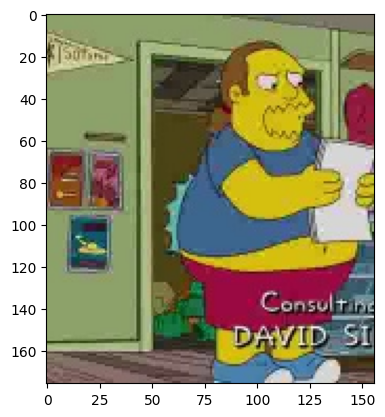

In [36]:
import matplotlib.pyplot as plt
from PIL import Image
image = Image.open('kaggle_simpson_testset/kaggle_simpson_testset/comic_book_guy_12.jpg')
plt.imshow(image)
plt.show
image = trans(image).unsqueeze(0).cuda()
with torch.no_grad():
  output = model(image)
pred = (output.argmax(dim=1)).to('cpu').numpy()
print(target_labels[pred[0]])

- Зачем нужны BN, что они дают +-
- формула softmax +
- зачем нужны нормализации входа +-
- формула SGD + momentum
- зачем применять weight_decay?
- что такое micro усреднение
- пример precision=1 recall=0